In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns.

In [4]:
dates = pd.date_range('20130101',periods=6)
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2013-01-01, ..., 2013-01-06]
Length: 6, Freq: D, Timezone: None

In [7]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.792956,0.084110,-0.159175,0.327368
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-04,-0.220636,0.229440,0.236236,-0.424410
2013-01-05,0.062344,1.501535,1.331855,-0.614323
2013-01-06,-0.296587,0.713829,-1.474288,1.285733


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [12]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                   'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
print df2
print df2.dtypes

   A          B  C  D      E    F
0  1 2013-01-02  1  3   test  foo
1  1 2013-01-02  1  3  train  foo
2  1 2013-01-02  1  3   test  foo
3  1 2013-01-02  1  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# Viewing Data

In [14]:
#See the top & bottom rows of the frame
df.head()
df.tail(3)

,A,B,C,D
2013-01-04,-0.220636,0.229440,0.236236,-0.424410
2013-01-05,0.062344,1.501535,1.331855,-0.614323
2013-01-06,-0.296587,0.713829,-1.474288,1.285733


In [15]:
#Display the index,columns, and the underlying numpy data
df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2013-01-01, ..., 2013-01-06]
Length: 6, Freq: D, Timezone: None

In [16]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [17]:
df.values

array([[-0.79295631,  0.0841096 , -0.15917527,  0.32736834],
       [ 1.10438557,  1.47421798,  1.77354476,  1.55255377],
       [ 0.14715337,  0.67656079,  0.90626088,  0.54916218],
       [-0.22063609,  0.22943953,  0.23623617, -0.42440973],
       [ 0.06234432,  1.50153507,  1.3318551 , -0.61432298],
       [-0.29658683,  0.71382917, -1.47428786,  1.28573303]])

In [18]:
#Describe shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.000617,0.779949,0.435739,0.446014
std,0.634134,0.600834,1.170988,0.875925
min,-0.792956,0.084110,-1.474288,-0.614323
25%,-0.277599,0.341220,-0.060322,-0.236465
50%,-0.079146,0.695195,0.571249,0.438265
75%,0.125951,1.284121,1.225457,1.101590
max,1.104386,1.501535,1.773545,1.552554


In [19]:
#Transposing your data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.792956,1.104386,0.147153,-0.220636,0.062344,-0.296587
B,0.084110,1.474218,0.676561,0.229440,1.501535,0.713829
C,-0.159175,1.773545,0.906261,0.236236,1.331855,-1.474288
D,0.327368,1.552554,0.549162,-0.424410,-0.614323,1.285733


In [20]:
#Sorting by an axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.327368,-0.159175,0.084110,-0.792956
2013-01-02,1.552554,1.773545,1.474218,1.104386
2013-01-03,0.549162,0.906261,0.676561,0.147153
2013-01-04,-0.424410,0.236236,0.229440,-0.220636
2013-01-05,-0.614323,1.331855,1.501535,0.062344
2013-01-06,1.285733,-1.474288,0.713829,-0.296587


In [21]:
 df.sort(columns='B')

,A,B,C,D
2013-01-01,-0.792956,0.084110,-0.159175,0.327368
2013-01-04,-0.220636,0.229440,0.236236,-0.424410
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-06,-0.296587,0.713829,-1.474288,1.285733
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-05,0.062344,1.501535,1.331855,-0.614323


# Selection

**Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.**

## Getting

In [24]:
#Selecting a single column, which yields a Series, equivalent to df.A
df['A']

2013-01-01   -0.792956
2013-01-02    1.104386
2013-01-03    0.147153
2013-01-04   -0.220636
2013-01-05    0.062344
2013-01-06   -0.296587
Freq: D, Name: A, dtype: float64

In [25]:
#Selecting via [], which slices the rows.
df[0:3]
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-04,-0.220636,0.229440,0.236236,-0.424410


## Selection by Label¶

In [26]:
df

,A,B,C,D
2013-01-01,-0.792956,0.084110,-0.159175,0.327368
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-04,-0.220636,0.229440,0.236236,-0.424410
2013-01-05,0.062344,1.501535,1.331855,-0.614323
2013-01-06,-0.296587,0.713829,-1.474288,1.285733


In [28]:
df.loc[dates[0]]

A   -0.792956
B    0.084110
C   -0.159175
D    0.327368
Name: 2013-01-01 00:00:00, dtype: float64

In [29]:
 df.loc[:,['A','B']]

,A,B
2013-01-01,-0.792956,0.084110
2013-01-02,1.104386,1.474218
2013-01-03,0.147153,0.676561
2013-01-04,-0.220636,0.229440
2013-01-05,0.062344,1.501535
2013-01-06,-0.296587,0.713829


In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.104386,1.474218
2013-01-03,0.147153,0.676561
2013-01-04,-0.220636,0.229440


In [31]:
df.loc['20130102',['A','B']]

A    1.104386
B    1.474218
Name: 2013-01-02 00:00:00, dtype: float64

In [32]:
df.loc[dates[0],'A']

-0.79295630894041613

In [34]:
#For getting fast access to a scalar (equiv to the prior method)
df.at[dates[0],'A']

-0.79295630894041613

## Selection by Position`

In [36]:
df

,A,B,C,D
2013-01-01,-0.792956,0.084110,-0.159175,0.327368
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-04,-0.220636,0.229440,0.236236,-0.424410
2013-01-05,0.062344,1.501535,1.331855,-0.614323
2013-01-06,-0.296587,0.713829,-1.474288,1.285733


In [38]:
df.iloc[3]

A   -0.220636
B    0.229440
C    0.236236
D   -0.424410
Name: 2013-01-04 00:00:00, dtype: float64

In [39]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.220636,0.229440
2013-01-05,0.062344,1.501535


In [40]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.104386,1.773545
2013-01-03,0.147153,0.906261
2013-01-05,0.062344,1.331855


In [41]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162


In [42]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.084110,-0.159175
2013-01-02,1.474218,1.773545
2013-01-03,0.676561,0.906261
2013-01-04,0.229440,0.236236
2013-01-05,1.501535,1.331855
2013-01-06,0.713829,-1.474288


In [43]:
df.iloc[1,1]

1.4742179785125082

In [44]:
#For getting fast access to a scalar (equiv to the prior method)
df.iat[1,1]

1.4742179785125082

## Boolean Indexing

In [45]:
df

,A,B,C,D
2013-01-01,-0.792956,0.084110,-0.159175,0.327368
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-04,-0.220636,0.229440,0.236236,-0.424410
2013-01-05,0.062344,1.501535,1.331855,-0.614323
2013-01-06,-0.296587,0.713829,-1.474288,1.285733


In [46]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-05,0.062344,1.501535,1.331855,-0.614323


In [47]:
#A where operation for getting.
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.084110,NaN,0.327368
2013-01-02,1.104386,1.474218,1.773545,1.552554
2013-01-03,0.147153,0.676561,0.906261,0.549162
2013-01-04,NaN,0.229440,0.236236,NaN
2013-01-05,0.062344,1.501535,1.331855,NaN
2013-01-06,NaN,0.713829,NaN,1.285733


In [48]:
#Using the isin() method for filtering:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
print df2
df2[df2['E'].isin(['two','four'])]

                   A         B         C         D      E
2013-01-01 -0.792956  0.084110 -0.159175  0.327368    one
2013-01-02  1.104386  1.474218  1.773545  1.552554    one
2013-01-03  0.147153  0.676561  0.906261  0.549162    two
2013-01-04 -0.220636  0.229440  0.236236 -0.424410  three
2013-01-05  0.062344  1.501535  1.331855 -0.614323   four
2013-01-06 -0.296587  0.713829 -1.474288  1.285733  three


,A,B,C,D,E
2013-01-03,0.147153,0.676561,0.906261,0.549162,two
2013-01-05,0.062344,1.501535,1.331855,-0.614323,four


## Setting

In [49]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [53]:
#Setting a new column automatically aligns the data by the indexes
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.792956,0.084110,-0.159175,0.327368,NaN
2013-01-02,1.104386,1.474218,1.773545,1.552554,1
2013-01-03,0.147153,0.676561,0.906261,0.549162,2
2013-01-04,-0.220636,0.229440,0.236236,-0.424410,3
2013-01-05,0.062344,1.501535,1.331855,-0.614323,4
2013-01-06,-0.296587,0.713829,-1.474288,1.285733,5


In [54]:
#Setting values by label
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.084110,-0.159175,0.327368,NaN
2013-01-02,1.104386,1.474218,1.773545,1.552554,1
2013-01-03,0.147153,0.676561,0.906261,0.549162,2
2013-01-04,-0.220636,0.229440,0.236236,-0.424410,3
2013-01-05,0.062344,1.501535,1.331855,-0.614323,4
2013-01-06,-0.296587,0.713829,-1.474288,1.285733,5


In [55]:
#Setting values by position
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.159175,0.327368,NaN
2013-01-02,1.104386,1.474218,1.773545,1.552554,1
2013-01-03,0.147153,0.676561,0.906261,0.549162,2
2013-01-04,-0.220636,0.229440,0.236236,-0.424410,3
2013-01-05,0.062344,1.501535,1.331855,-0.614323,4
2013-01-06,-0.296587,0.713829,-1.474288,1.285733,5


In [56]:
#Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5] * len(df)) 
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.159175,5,NaN
2013-01-02,1.104386,1.474218,1.773545,5,1
2013-01-03,0.147153,0.676561,0.906261,5,2
2013-01-04,-0.220636,0.229440,0.236236,5,3
2013-01-05,0.062344,1.501535,1.331855,5,4
2013-01-06,-0.296587,0.713829,-1.474288,5,5


In [59]:
#A where operation with setting.
print df
df2 = df.copy()
df2[df2 > 0] = -df2
print df2

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175  5 NaN
2013-01-02  1.104386  1.474218  1.773545  5   1
2013-01-03  0.147153  0.676561  0.906261  5   2
2013-01-04 -0.220636  0.229440  0.236236  5   3
2013-01-05  0.062344  1.501535  1.331855  5   4
2013-01-06 -0.296587  0.713829 -1.474288  5   5
                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175 -5 NaN
2013-01-02 -1.104386 -1.474218 -1.773545 -5  -1
2013-01-03 -0.147153 -0.676561 -0.906261 -5  -2
2013-01-04 -0.220636 -0.229440 -0.236236 -5  -3
2013-01-05 -0.062344 -1.501535 -1.331855 -5  -4
2013-01-06 -0.296587 -0.713829 -1.474288 -5  -5


# Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section



In [62]:
#Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
print df
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
print df1

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175  5 NaN
2013-01-02  1.104386  1.474218  1.773545  5   1
2013-01-03  0.147153  0.676561  0.906261  5   2
2013-01-04 -0.220636  0.229440  0.236236  5   3
2013-01-05  0.062344  1.501535  1.331855  5   4
2013-01-06 -0.296587  0.713829 -1.474288  5   5
                   A         B         C  D   F   E
2013-01-01  0.000000  0.000000 -0.159175  5 NaN   1
2013-01-02  1.104386  1.474218  1.773545  5   1   1
2013-01-03  0.147153  0.676561  0.906261  5   2 NaN
2013-01-04 -0.220636  0.229440  0.236236  5   3 NaN


In [64]:
#drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.104386,1.474218,1.773545,5,1,1


In [66]:
#Filling missing data
print df1.fillna(value=5)
print df1

                   A         B         C  D  F  E
2013-01-01  0.000000  0.000000 -0.159175  5  5  1
2013-01-02  1.104386  1.474218  1.773545  5  1  1
2013-01-03  0.147153  0.676561  0.906261  5  2  5
2013-01-04 -0.220636  0.229440  0.236236  5  3  5
                   A         B         C  D   F   E
2013-01-01  0.000000  0.000000 -0.159175  5 NaN   1
2013-01-02  1.104386  1.474218  1.773545  5   1   1
2013-01-03  0.147153  0.676561  0.906261  5   2 NaN
2013-01-04 -0.220636  0.229440  0.236236  5   3 NaN


In [67]:
#To get the boolean mask where values are nan
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

In [69]:
print df
print df.mean()
print df.mean(0)
print df.mean(1)

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175  5 NaN
2013-01-02  1.104386  1.474218  1.773545  5   1
2013-01-03  0.147153  0.676561  0.906261  5   2
2013-01-04 -0.220636  0.229440  0.236236  5   3
2013-01-05  0.062344  1.501535  1.331855  5   4
2013-01-06 -0.296587  0.713829 -1.474288  5   5
A    0.132777
B    0.765930
C    0.435739
D    5.000000
F    3.000000
dtype: float64
A    0.132777
B    0.765930
C    0.435739
D    5.000000
F    3.000000
dtype: float64
2013-01-01    1.210206
2013-01-02    2.070430
2013-01-03    1.745995
2013-01-04    1.649008
2013-01-05    2.379147
2013-01-06    1.788591
Freq: D, dtype: float64


In [75]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
print s
print df
print df.sub(s,axis='index')

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64
                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175  5 NaN
2013-01-02  1.104386  1.474218  1.773545  5   1
2013-01-03  0.147153  0.676561  0.906261  5   2
2013-01-04 -0.220636  0.229440  0.236236  5   3
2013-01-05  0.062344  1.501535  1.331855  5   4
2013-01-06 -0.296587  0.713829 -1.474288  5   5
                   A         B         C   D   F
2013-01-01       NaN       NaN       NaN NaN NaN
2013-01-02       NaN       NaN       NaN NaN NaN
2013-01-03 -0.852847 -0.323439 -0.093739   4   1
2013-01-04 -3.220636 -2.770560 -2.763764   2   0
2013-01-05 -4.937656 -3.498465 -3.668145   0  -1
2013-01-06       NaN       NaN       NaN NaN NaN


## Apply

In [76]:
print df
print df.apply(np.cumsum)

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175  5 NaN
2013-01-02  1.104386  1.474218  1.773545  5   1
2013-01-03  0.147153  0.676561  0.906261  5   2
2013-01-04 -0.220636  0.229440  0.236236  5   3
2013-01-05  0.062344  1.501535  1.331855  5   4
2013-01-06 -0.296587  0.713829 -1.474288  5   5
                   A         B         C   D   F
2013-01-01  0.000000  0.000000 -0.159175   5 NaN
2013-01-02  1.104386  1.474218  1.614369  10   1
2013-01-03  1.251539  2.150779  2.520630  15   3
2013-01-04  1.030903  2.380218  2.756867  20   6
2013-01-05  1.093247  3.881753  4.088722  25  10
2013-01-06  0.796660  4.595583  2.614434  30  15


In [77]:
print df
print df.apply(lambda x: x.max() - x.min())

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175  5 NaN
2013-01-02  1.104386  1.474218  1.773545  5   1
2013-01-03  0.147153  0.676561  0.906261  5   2
2013-01-04 -0.220636  0.229440  0.236236  5   3
2013-01-05  0.062344  1.501535  1.331855  5   4
2013-01-06 -0.296587  0.713829 -1.474288  5   5
A    1.400972
B    1.501535
C    3.247833
D    0.000000
F    4.000000
dtype: float64


## Histogramming

In [79]:
s = pd.Series(np.random.randint(0,7,size=10))
print s
print s.value_counts()

0    3
1    4
2    6
3    5
4    4
5    1
6    1
7    4
8    1
9    0
dtype: int64
4    3
1    3
6    1
5    1
3    1
0    1
dtype: int64


## String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [81]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, \
               'CABA', 'dog', 'cat'])
print s
print s.str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object
0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


# Merge

## concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [88]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10, 4))
print df
pieces = [df[:3], df[3:7], df[7:]]
print "\n piece type :",type(pieces),"\n"
print pieces[0]
print pieces[1]
print pieces[2]
print "\n concat pieces together \n"
print pd.concat(pieces)

          0         1         2         3
0 -0.272219  0.993508  0.864904 -0.149095
1 -1.636606  0.539019  0.954498 -0.595226
2 -1.079698 -1.708818  0.424617  1.206277
3 -0.757038 -0.000787  0.232827  1.383599
4  0.702266  0.128671  1.673672 -0.168579
5  0.822283  0.995489  0.047398  0.579476
6  1.187499 -0.905631  0.735072 -0.266238
7 -0.917691 -0.948409  0.594922  0.135044
8  1.552918  0.485571 -0.979305  1.799301
9  0.887025  0.100552  0.651388 -0.776521

 piece type : <type 'list'> 

          0         1         2         3
0 -0.272219  0.993508  0.864904 -0.149095
1 -1.636606  0.539019  0.954498 -0.595226
2 -1.079698 -1.708818  0.424617  1.206277
          0         1         2         3
3 -0.757038 -0.000787  0.232827  1.383599
4  0.702266  0.128671  1.673672 -0.168579
5  0.822283  0.995489  0.047398  0.579476
6  1.187499 -0.905631  0.735072 -0.266238
          0         1         2         3
7 -0.917691 -0.948409  0.594922  0.135044
8  1.552918  0.485571 -0.979305  1.799301
9  

## Join

In [90]:
#SQL style merges.
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo','foo'], 'rval': [4, 5]})
print left
print right
pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append

In [91]:
#Append rows to a dataframe.
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
print df
s = df.iloc[3]
print df.append(s,ignore_index=True)

          A         B         C         D
0 -0.038200 -0.272221  0.532765 -2.583579
1 -0.644867 -0.506176  3.389710  0.004709
2 -0.269085 -0.705267 -0.843736 -0.172180
3 -1.404201  2.187497 -1.489719 -0.542661
4  1.916902  1.798324  0.608762  0.653029
5 -1.466146  1.374280  0.513304  0.592116
6  0.632845  1.659344  0.991449 -0.686177
7 -0.428760  0.166296  0.063170  0.821904
          A         B         C         D
0 -0.038200 -0.272221  0.532765 -2.583579
1 -0.644867 -0.506176  3.389710  0.004709
2 -0.269085 -0.705267 -0.843736 -0.172180
3 -1.404201  2.187497 -1.489719 -0.542661
4  1.916902  1.798324  0.608762  0.653029
5 -1.466146  1.374280  0.513304  0.592116
6  0.632845  1.659344  0.991449 -0.686177
7 -0.428760  0.166296  0.063170  0.821904
8 -1.404201  2.187497 -1.489719 -0.542661


# Grouping

By “group by” we are referring to a process involving one or more of the following steps

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [110]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                     'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                      'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.347950,0.739682
1,bar,one,0.070980,0.154352
2,foo,two,0.913801,1.613352
3,bar,three,-0.155928,-0.737453
4,foo,two,-0.276117,1.840529
5,bar,two,0.944531,-1.726538
6,foo,one,-1.163390,-0.473601
7,foo,three,-0.329873,-1.355682


In [93]:
#Grouping and then applying a function sum to the resulting groups.
df.groupby('A').sum()

,C,D
A,,
bar,0.627720,-2.328836
foo,0.510252,-3.510888


In [94]:
#Grouping by multiple columns forms a hierarchical index, 
#which we then apply the function.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.043455 -0.892391
    three  0.713139 -0.244164
    two   -0.041964 -1.192282
foo one    0.431874 -3.513705
    three -0.818926 -1.131027
    two    0.897304  1.133844

# Reshaping

## Stack 

In [108]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                       'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print df
df2=df[:4]
print df2

                     A         B
first second                    
bar   one    -0.328074 -0.051652
      two     0.615351  0.521032
baz   one     0.167838 -0.921150
      two     0.467448 -0.646872
foo   one    -0.068372 -0.139670
      two    -0.188018 -1.319506
qux   one    -0.595748  0.071575
      two    -1.719014  2.007593
                     A         B
first second                    
bar   one    -0.328074 -0.051652
      two     0.615351  0.521032
baz   one     0.167838 -0.921150
      two     0.467448 -0.646872


In [112]:
#stack and unstack
stacked = df2.stack()
print df2
print stacked
print stacked.unstack()
print stacked.unstack(1)
print stacked.unstack(0)

                   A         B         C  D   F
2013-01-01  0.000000  0.000000 -0.159175 -5 NaN
2013-01-02 -1.104386 -1.474218 -1.773545 -5  -1
2013-01-03 -0.147153 -0.676561 -0.906261 -5  -2
2013-01-04 -0.220636 -0.229440 -0.236236 -5  -3
2013-01-05 -0.062344 -1.501535 -1.331855 -5  -4
2013-01-06 -0.296587 -0.713829 -1.474288 -5  -5
2013-01-01  A    0.000000
            B    0.000000
            C   -0.159175
            D   -5.000000
2013-01-02  A   -1.104386
            B   -1.474218
            C   -1.773545
            D   -5.000000
            F   -1.000000
2013-01-03  A   -0.147153
            B   -0.676561
            C   -0.906261
            D   -5.000000
            F   -2.000000
2013-01-04  A   -0.220636
            B   -0.229440
            C   -0.236236
            D   -5.000000
            F   -3.000000
2013-01-05  A   -0.062344
            B   -1.501535
            C   -1.331855
            D   -5.000000
            F   -4.000000
2013-01-06  A   -0.296587
            B 

## Pivot Tables

In [115]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                       'B' : ['A', 'B', 'C'] * 4,
                       'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D' : np.random.randn(12),
                       'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.289943,2.004419
1,one,B,foo,-0.752884,0.515415
2,two,C,foo,-0.589713,0.082738
3,three,A,bar,-1.079671,-0.591211
4,one,B,bar,0.686716,1.910904
5,one,C,bar,0.796919,1.035204
6,two,A,foo,1.007516,-1.065222
7,three,B,foo,-0.523727,0.431547
8,one,C,foo,-0.852879,1.167139
9,one,A,bar,-0.187958,0.764604


In [116]:
#We can produce pivot tables from this data very easily:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.187958 -0.289943
      B  0.686716 -0.752884
      C  0.796919 -0.852879
three A -1.079671       NaN
      B       NaN -0.523727
      C  1.647010       NaN
two   A       NaN  1.007516
      B  1.390811       NaN
      C       NaN -0.589713

# Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section

In [125]:
#converting secondly data into 5-minutely data)
rng = pd.date_range('1/1/2012', periods=100, freq='S')
print rng
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print ts
print ts.resample('5Min', how='sum')

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-01-01 00:00:00, ..., 2012-01-01 00:01:39]
Length: 100, Freq: S, Timezone: None
2012-01-01 00:00:00    259
2012-01-01 00:00:01     31
2012-01-01 00:00:02    278
2012-01-01 00:00:03    329
2012-01-01 00:00:04    470
2012-01-01 00:00:05    196
2012-01-01 00:00:06     80
2012-01-01 00:00:07    455
2012-01-01 00:00:08    185
2012-01-01 00:00:09    154
2012-01-01 00:00:10    151
2012-01-01 00:00:11     33
2012-01-01 00:00:12    201
2012-01-01 00:00:13    211
2012-01-01 00:00:14    292
...
2012-01-01 00:01:25    312
2012-01-01 00:01:26    395
2012-01-01 00:01:27    311
2012-01-01 00:01:28     53
2012-01-01 00:01:29    421
2012-01-01 00:01:30    136
2012-01-01 00:01:31    255
2012-01-01 00:01:32    306
2012-01-01 00:01:33     79
2012-01-01 00:01:34    246
2012-01-01 00:01:35    235
2012-01-01 00:01:36     42
2012-01-01 00:01:37     60
2012-01-01 00:01:38     10
2012-01-01 00:01:39    321
Freq: S, Length: 100
2012-01-01    25950
Freq: 5T, dtype

In [127]:
#Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
print ts
ts_utc = ts.tz_localize('UTC')
print ts_utc

2012-03-06    0.703688
2012-03-07    1.556079
2012-03-08    1.065112
2012-03-09   -0.628777
2012-03-10   -1.320270
Freq: D, dtype: float64
2012-03-06 00:00:00+00:00    0.703688
2012-03-07 00:00:00+00:00    1.556079
2012-03-08 00:00:00+00:00    1.065112
2012-03-09 00:00:00+00:00   -0.628777
2012-03-10 00:00:00+00:00   -1.320270
Freq: D, dtype: float64


In [128]:
#Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.703688
2012-03-06 19:00:00-05:00    1.556079
2012-03-07 19:00:00-05:00    1.065112
2012-03-08 19:00:00-05:00   -0.628777
2012-03-09 19:00:00-05:00   -1.320270
Freq: D, dtype: float64

In [129]:
#Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print ts
ps = ts.to_period()
print ps
ps.to_timestamp()

2012-01-31   -0.164255
2012-02-29   -1.129794
2012-03-31    0.131375
2012-04-30    0.768668
2012-05-31    0.815963
Freq: M, dtype: float64
2012-01   -0.164255
2012-02   -1.129794
2012-03    0.131375
2012-04    0.768668
2012-05    0.815963
Freq: M, dtype: float64


2012-01-01   -0.164255
2012-02-01   -1.129794
2012-03-01    0.131375
2012-04-01    0.768668
2012-05-01    0.815963
Freq: MS, dtype: float64

In [130]:
#Converting between period and timestamp enables some convenient 
#arithmetic functions to be used. In the following example, 
#we convert a quarterly frequency with year ending in November to 
#9am of the end of the month following the quarter end:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
print ts
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
print ts.head()

1990Q1    0.973174
1990Q2    0.112756
1990Q3   -0.268907
1990Q4   -0.478822
1991Q1    0.324542
1991Q2    0.094056
1991Q3    0.431177
1991Q4    0.460865
1992Q1    0.306948
1992Q2   -0.220520
1992Q3    0.948454
1992Q4    1.390206
1993Q1    0.292302
1993Q2   -0.060750
1993Q3    1.241085
1993Q4    0.142835
1994Q1   -0.248524
1994Q2    0.095749
1994Q3    0.437220
1994Q4   -0.077856
1995Q1   -0.532360
1995Q2    0.541076
1995Q3   -1.297984
1995Q4   -0.849475
1996Q1    0.098470
1996Q2    1.250369
1996Q3    0.407780
1996Q4    0.520080
1997Q1    0.505783
1997Q2    1.796660
1997Q3    0.474443
1997Q4   -1.759735
1998Q1    0.961939
1998Q2   -0.446974
1998Q3    0.342179
1998Q4    0.022200
1999Q1    0.169705
1999Q2    1.384838
1999Q3   -1.172412
1999Q4    0.736279
2000Q1   -1.878445
2000Q2    0.754873
2000Q3    2.195027
2000Q4   -0.187547
Freq: Q-NOV, dtype: float64
1990-03-01 09:00    0.973174
1990-06-01 09:00    0.112756
1990-09-01 09:00   -0.268907
1990-12-01 09:00   -0.478822
1991-03-01 09:00    

# Categoricals

In [132]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
print df
#Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")
print df['grade']

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e
0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a < b < e]


In [134]:
#Rename the categories to more meaningful names 
#(assigning to Series.cat.categories is inplace!)
df["grade"].cat.categories = ["very good", "good", "very bad"]
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good < good < very bad]

In [135]:
#Reorder the categories and simultaneously add the missing categories 
#(methods under Series .cat return a new Series per default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]
 

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad < bad < medium < good < very good]

In [136]:
#Sorting is per order in the categories, not lexical order.
df.sort("grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [137]:
#Grouping by a categorical column shows also empty categories.
df.groupby("grade").size()

grade
very bad      1
bad         NaN
medium      NaN
good          2
very good     3
dtype: float64

# Plotting

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

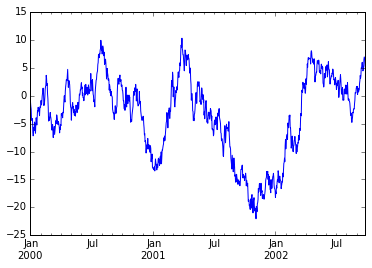

In [147]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

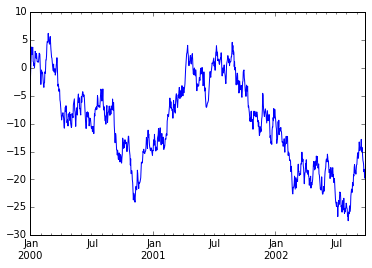

In [148]:
#On DataFrame, plot is a convenience to plot 
#all of the columns with labels:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out

## CSV

In [ ]:
#writing to a csv
df.to_csv("foo.csv")
#reading from a csv
pd.read_csv("foo.csv")

## HDF5

In [ ]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

## EXCEL

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])